# Assignment 1

In [33]:
import math
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Part  1

### Take any image and perform Gaussian filtering, box filtering and median filtering. Also provide comments on the results.

Guassian

In [34]:
def generate_gaussian_kernel(size=5, sigma=5):
    
    axis = np.linspace(-(size - 1) / 2., (size - 1) / 2., size)
    x, y = np.meshgrid(axis, axis)

    gaussian_kernel = np.exp(-0.5 * (np.square(x) + np.square(y)) / np.square(sigma))

    return gaussian_kernel / np.sum(gaussian_kernel)

In [35]:
# Load the image
image = cv2.imread('image.jpeg')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Generate a Gaussian kernel
kernel_size = 5
sigma = 15
gaussian_kernel = generate_gaussian_kernel(kernel_size, sigma)

# Apply the Gaussian filter
filtered_image = cv2.filter2D(gray_image, -1, gaussian_kernel)

# Convert the filtered image back to RGB
filtered_image_rgb = cv2.cvtColor(filtered_image, cv2.COLOR_GRAY2RGB)

# Print the kernel
print("Gaussian Kernel: ", gaussian_kernel)


Gaussian Kernel:  [[0.03964547 0.03991066 0.03999945 0.03991066 0.03964547]
 [0.03991066 0.04017762 0.040267   0.04017762 0.03991066]
 [0.03999945 0.040267   0.04035658 0.040267   0.03999945]
 [0.03991066 0.04017762 0.040267   0.04017762 0.03991066]
 [0.03964547 0.03991066 0.03999945 0.03991066 0.03964547]]


In [36]:
# Display and save the results
cv2.imshow('Original Image', img)
cv2.imshow('Gaussian Blur', dst)

cv2.waitKey(0)
cv2.destroyAllWindows()

Box Filtering

In [37]:
def box_blur(image, kernel_size):
    height, width = image.shape
    kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size**2)
    
    result = np.zeros((height, width), dtype=np.uint8)
    
    half_kernel = kernel_size // 2

    for y in range(half_kernel, height - half_kernel):
        for x in range(half_kernel, width - half_kernel):
            # Apply the kernel to the neighborhood
            neighborhood = image[y - half_kernel:y + half_kernel + 1, x - half_kernel:x + half_kernel + 1]
            weighted_sum = np.sum(neighborhood * kernel)
            result[y, x] = int(weighted_sum)
    
    return result


In [38]:
image = cv2.imread('image.jpeg', cv2.IMREAD_GRAYSCALE)
kernel_size = 5
blurred_image = box_blur(image, kernel_size)
cv2.imshow('Original Image', image)
cv2.imshow('Box Blur', blurred_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Median Filtering

### Part 2

### Take any image and detect edges by using Sobel and Perwitt Kernel. Comment on both results.

prewit

In [39]:
#define a prewtitt kernel
kernel_x = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
kernel_y = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
#read the image in grayscale
img = cv2.imread('image.jpeg',0)
#apply the kernels to the image and add the images
prewittx = cv2.filter2D(img, -1, kernel_x)
prewitty = cv2.filter2D(img, -1, kernel_y)
#invert the image for edge detection
#prewittx = cv2.bitwise_not(prewittx)
#prewitty = cv2.bitwise_not(prewitty)
#show the image
cv2.imshow('Original Image', img)
cv2.imshow('Prewitt X', prewittx)
cv2.imshow('Prewitt Y', prewitty)
cv2.waitKey(0)
cv2.destroyAllWindows()

Sobel

In [40]:
#define a sobel kernel
kernel_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
kernel_y = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
#read the image in grayscale
img = cv2.imread('image.jpeg',0)
#apply the kernels to the image and add the images
sobelx = cv2.filter2D(img, -1, kernel_x)
sobely = cv2.filter2D(img, -1, kernel_y)
#invert the image for edge detection
#sobelx = cv2.bitwise_not(sobelx)
#sobely = cv2.bitwise_not(sobely)
#show the image
cv2.imshow('Original Image', img)
cv2.imshow('Sobel X', sobelx)
cv2.imshow('Sobel Y', sobely)
cv2.waitKey(0)
cv2.destroyAllWindows()


Part 3

Take any image and plot its histogram representation.

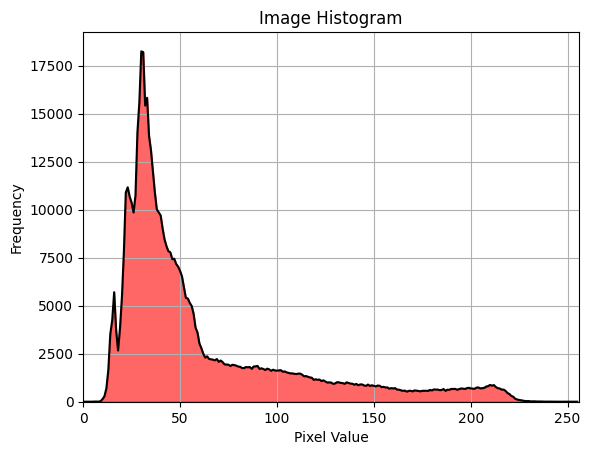

In [41]:

# Load the image in grayscale
img = cv2.imread('image.jpeg', 0)

# Calculate the histogram
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

# Create a figure and axis
fig, ax = plt.subplots()

# Customize the plot
ax.plot(hist, color='black')
ax.fill_between(range(256), hist.flatten(), 0, color='red', alpha=0.6)
ax.set_xlim(0, 256)
ax.set_ylim(0, max(hist) + 1000)
ax.set_xlabel('Pixel Value')
ax.set_ylabel('Frequency')
ax.set_title('Image Histogram')
ax.grid(True)

# Show the plot
plt.show()

Part 4 

Take a colored image and provide its gray and binary representation.

In [43]:
# Load a colored image
image = cv2.imread('image.jpg')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to create a binary image
_, binary_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)

# Display the original, grayscale, and binary images
cv2.imshow('Original Image', image)
cv2.imshow('Grayscale Image', gray_image)
cv2.imshow('Binary Image', binary_image)

cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


Part 5

Take any image and detect the corners by employing Harris corner detection.